In [2]:
import pandas as pd #data processing
import numpy as np #linear algebra
#import statsmodels.api as su
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.mlab as mlab
%matplotlib inline
# matplotlib.inline allows you to interact with your plots directly in the notebook or shell output,
#such as zooming, panning, and saving

Data Preparation

In [5]:
df = pd.read_csv("heartdiseases.csv")
df.drop(['education'],axis=1,inplace=True)
df.head()

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


missing values

In [6]:
df.isnull().sum()

male                 0
age                  0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [8]:
count = 0
for i in df.isnull().sum(axis=1):
    if i>0: 
        count = count + 1
print('Total no. of rows with missing values is', count)
print('Since it is only', round((count/len(df.index))*100),'percent of the entire dataset the rows with missing values are excluded.')


Total no. of rows with missing values is 489
Since it is only 12 percent of the entire dataset the rows with missing values are excluded.


In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.isnull().sum()

male               0
age                0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Exploratory Analysis



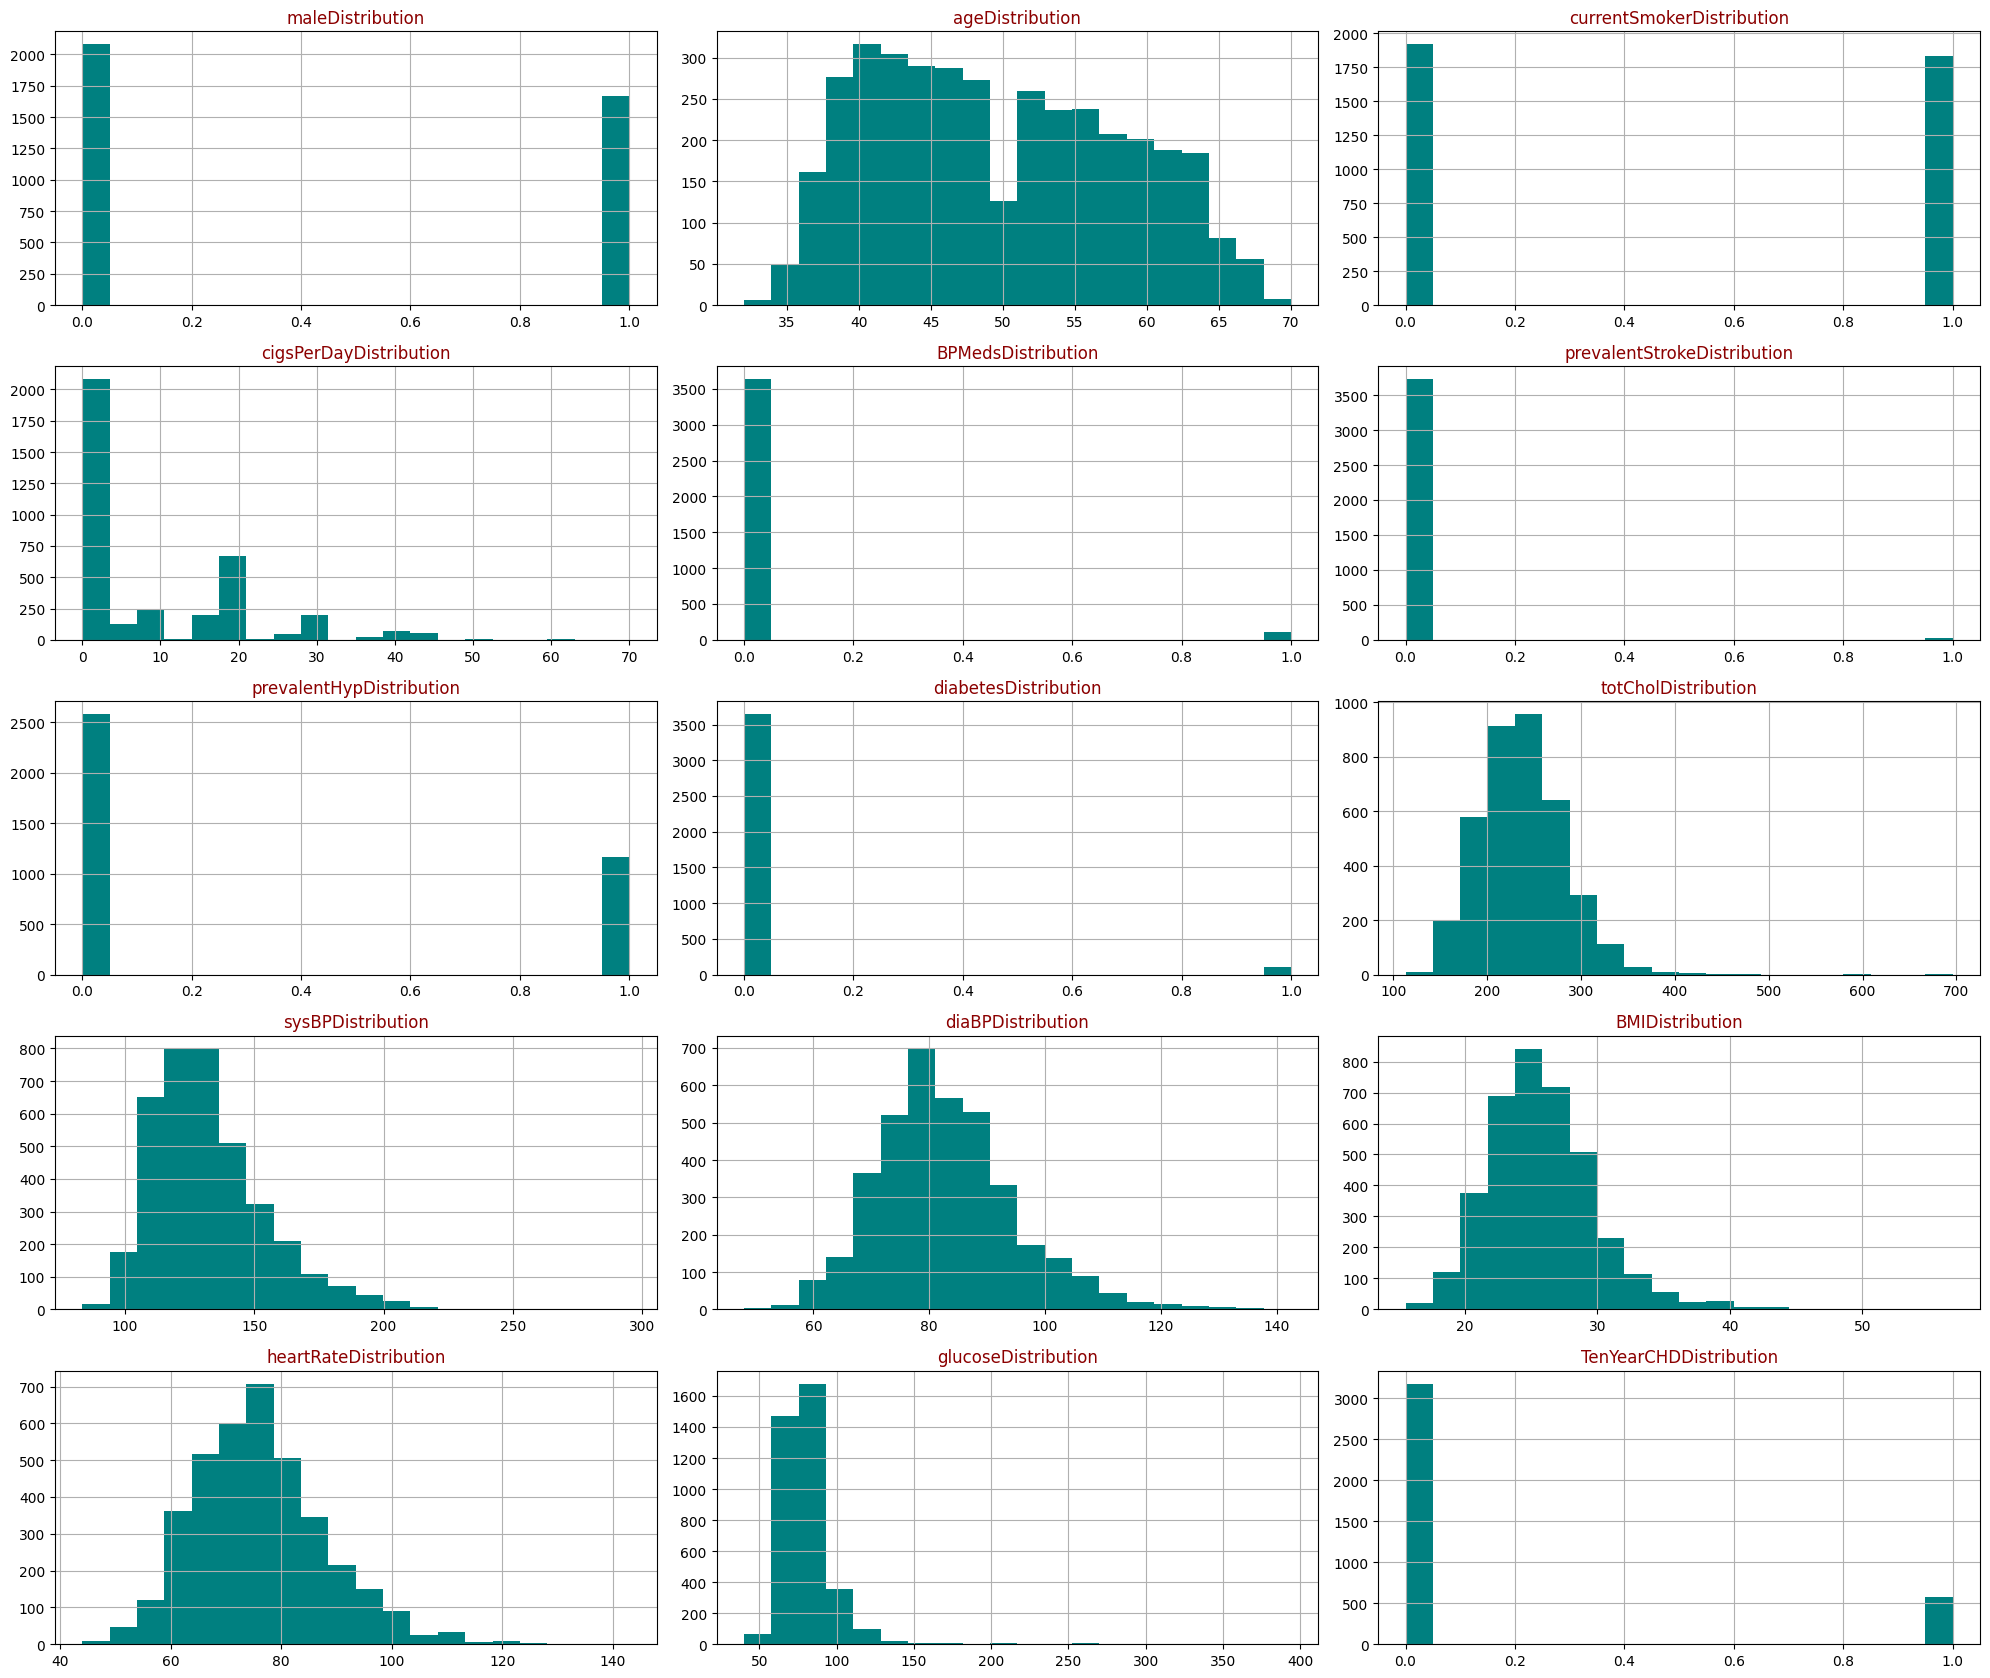

In [13]:
def draw_hist(dataframe, features, rows, cols):
    fig = plt.figure(figsize=(20,20))
    for i, feature in enumerate(features): 
        ax = fig.add_subplot(rows,cols,i+1)
        dataframe[feature].hist(bins=20,ax=ax, facecolor = 'teal')
        ax.set_title(feature+"Distribution",color='DarkRed')
    fig.tight_layout()
    plt.show()
draw_hist(df,df.columns,6,3)

#enumerate() allows us to iterate through a sequence but it keeps track of both the index and the element. 
#tight_layout() function in pyplot module of matplotlib library is used to automatically adjust subplot parameters to give specified padding.